### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lib.utils import read_all_file
import os

### Read the comments dataset

All comments full is saved in files csv start with 'comments_'

In [2]:
num_file, comment_df = read_all_file(
    folder_path=os.path.join('data', 'vebay69', 'raw'),
    prefix = 'comments_',
    suffix = '.csv',
)
num_file

1

In [3]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,comment_reactors,comment_reactions,comment_reaction_count,post_id
0,837711471436622,https://facebook.com/837711471436622,100000070123283,https://facebook.com/NganQuach3005?eav=AfbEHdv...,Quach Ngan,NaN,Haha tui cungz thích cảm giác phơi nắng,2023-11-20,NaN,[],NaN,NaN,685638947004646
1,1384359865797542,https://facebook.com/1384359865797542,100009632385831,https://facebook.com/mesa.missyou?eav=Afb7sjj6...,Nguyễn Nguyễn Lường,NaN,Quach Ngan 🌍Mấy ae vào nhanh group bem ngoại h...,2023-11-20,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,[],NaN,NaN,685638947004646
2,3619522008291568,https://facebook.com/3619522008291568,100014736247838,https://facebook.com/profile.php?id=1000147362...,Uyên Uyên,NaN,Hoàng Thúy,2023-11-19,https://scontent-sin6-2.xx.fbcdn.net/m1/v/t6/A...,[],NaN,NaN,685638947004646
3,844274764149865,https://facebook.com/844274764149865,100004673858376,https://facebook.com/muahe.tuyet.3386?eav=AfZq...,Hoàng Thúy,NaN,Uyên Uyên ấm 😂,2023-11-19,NaN,[],NaN,NaN,685638947004646
4,1824300658024919,https://facebook.com/1824300658024919,1851850359,https://facebook.com/profile.php?id=1851850359...,An Hồng Nhung,NaN,Phơi xong mặt nẻ toác ra,2023-11-20,NaN,[],NaN,NaN,685638947004646


In [4]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   comment_id              49 non-null     int64  
 1   comment_url             49 non-null     object 
 2   commenter_id            49 non-null     int64  
 3   commenter_url           49 non-null     object 
 4   commenter_name          49 non-null     object 
 5   commenter_meta          2 non-null      object 
 6   comment_text            49 non-null     object 
 7   comment_time            49 non-null     object 
 8   comment_image           25 non-null     object 
 9   comment_reactors        49 non-null     object 
 10  comment_reactions       0 non-null      float64
 11  comment_reaction_count  0 non-null      float64
 12  post_id                 49 non-null     int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 5.1+ KB


### Check missing data

In [5]:
missing_data = []
percentage_data = []

for i in comment_df.columns:
    missing_count = comment_df[i].isnull().sum()
    percentage = missing_count / len(comment_df) * 100
    missing_data.append(missing_count)
    percentage_data.append(percentage)

data = {'Columns': comment_df.columns, 'Missing Data': missing_data, 'Percentage': percentage_data}
df_summary = pd.DataFrame(data)
df_summary['Percentage'] = df_summary['Percentage'].round(2)
df_summary


,Columns,Missing Data,Percentage
0,comment_id,0,0.00
1,comment_url,0,0.00
2,commenter_id,0,0.00
3,commenter_url,0,0.00
4,commenter_name,0,0.00
5,commenter_meta,47,95.92
6,comment_text,0,0.00
7,comment_time,0,0.00
8,comment_image,24,48.98
9,comment_reactors,0,0.00


Plot a heatmap to visualize missing data

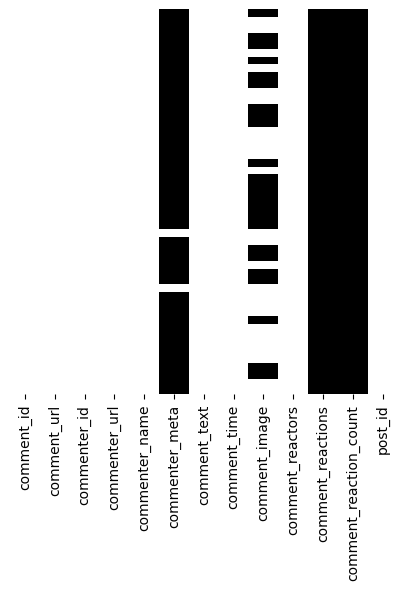

In [6]:
plt.figure(figsize=(5, 5))
sns.heatmap(comment_df.isnull(), cbar=False, cmap='binary', yticklabels=False);

### Drop columns: "comment_reactions", "comment_reaction_count", as all data in these are NaN or Null

In [7]:
comment_df.drop(columns=['comment_reaction_count', 'comment_reactions'], inplace=True)

In [8]:
comment_df['comment_reactors'].value_counts()

comment_reactors
[]    49
Name: count, dtype: int64

### Tất cả dữ liệu trong cột 'comment_reactors' đều là list rỗng.

In [9]:
comment_df.drop(columns=['comment_reactors'], inplace=True)

In [10]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,post_id
0,837711471436622,https://facebook.com/837711471436622,100000070123283,https://facebook.com/NganQuach3005?eav=AfbEHdv...,Quach Ngan,NaN,Haha tui cungz thích cảm giác phơi nắng,2023-11-20,NaN,685638947004646
1,1384359865797542,https://facebook.com/1384359865797542,100009632385831,https://facebook.com/mesa.missyou?eav=Afb7sjj6...,Nguyễn Nguyễn Lường,NaN,Quach Ngan 🌍Mấy ae vào nhanh group bem ngoại h...,2023-11-20,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,685638947004646
2,3619522008291568,https://facebook.com/3619522008291568,100014736247838,https://facebook.com/profile.php?id=1000147362...,Uyên Uyên,NaN,Hoàng Thúy,2023-11-19,https://scontent-sin6-2.xx.fbcdn.net/m1/v/t6/A...,685638947004646
3,844274764149865,https://facebook.com/844274764149865,100004673858376,https://facebook.com/muahe.tuyet.3386?eav=AfZq...,Hoàng Thúy,NaN,Uyên Uyên ấm 😂,2023-11-19,NaN,685638947004646
4,1824300658024919,https://facebook.com/1824300658024919,1851850359,https://facebook.com/profile.php?id=1851850359...,An Hồng Nhung,NaN,Phơi xong mặt nẻ toác ra,2023-11-20,NaN,685638947004646


In [11]:
comment_df['comment_image'].fillna('', inplace=True)
comment_df['commenter_meta'].fillna('', inplace=True)

In [14]:
comment_df['post_id'].value_counts()

post_id
685638947004646    31
685111467057394    14
685577330344141     4
Name: count, dtype: int64

In [13]:
comment_df.head()

,comment_id,comment_url,commenter_id,commenter_url,commenter_name,commenter_meta,comment_text,comment_time,comment_image,post_id
0,837711471436622,https://facebook.com/837711471436622,100000070123283,https://facebook.com/NganQuach3005?eav=AfbEHdv...,Quach Ngan,,Haha tui cungz thích cảm giác phơi nắng,2023-11-20,,685638947004646
1,1384359865797542,https://facebook.com/1384359865797542,100009632385831,https://facebook.com/mesa.missyou?eav=Afb7sjj6...,Nguyễn Nguyễn Lường,,Quach Ngan 🌍Mấy ae vào nhanh group bem ngoại h...,2023-11-20,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,685638947004646
2,3619522008291568,https://facebook.com/3619522008291568,100014736247838,https://facebook.com/profile.php?id=1000147362...,Uyên Uyên,,Hoàng Thúy,2023-11-19,https://scontent-sin6-2.xx.fbcdn.net/m1/v/t6/A...,685638947004646
3,844274764149865,https://facebook.com/844274764149865,100004673858376,https://facebook.com/muahe.tuyet.3386?eav=AfZq...,Hoàng Thúy,,Uyên Uyên ấm 😂,2023-11-19,,685638947004646
4,1824300658024919,https://facebook.com/1824300658024919,1851850359,https://facebook.com/profile.php?id=1851850359...,An Hồng Nhung,,Phơi xong mặt nẻ toác ra,2023-11-20,,685638947004646


In [ ]:
# comment_df.to_csv(os.path.join('data', 'vebay69', 'clean', 'comments_full.csv'), index=False)

In [ ]:
comment_df.shape